In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image

Завантаження даних

In [2]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Ініціалізація

In [4]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [5]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    return grads, cost

Оптимізація (градієнтний спуск)

In [6]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw, db = grads["dw"], grads["db"]
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")
    return {"w": w, "b": b}, {"dw": dw, "db": db}, costs

Прогноз

In [7]:
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)

Модель

In [8]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w, b = parameters["w"], parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100:.2f} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100:.2f} %")

    return {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }

Передбачення на нових зображеннях

In [9]:
def predict_and_show(image_path, model, num_px):
    image = Image.open(image_path)
    image = image.resize((num_px, num_px))
    image_np = np.asarray(image) / 255.
    image_flatten = image_np.reshape((num_px * num_px * 3, 1))

    prediction = predict(model["w"], model["b"], image_flatten)
    plt.imshow(image_np)
    plt.axis('off')
    title = f"Prediction: {'cat' if int(prediction) == 1 else 'non-cat'}"
    plt.title(title)
    plt.show()
    return image_path.split("/")[-1], int(prediction)

Запуск

In [10]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
num_px = train_set_x_orig.shape[1]
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

Навчання моделі

In [11]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5845083636993087
Cost after iteration 200: 0.4669490409465546
Cost after iteration 300: 0.37600686694802077
Cost after iteration 400: 0.3314632893282512
Cost after iteration 500: 0.30327306747438293
Cost after iteration 600: 0.27987958658260487
Cost after iteration 700: 0.2600421369258757
Cost after iteration 800: 0.2429406846779662
Cost after iteration 900: 0.22800422256726066
Cost after iteration 1000: 0.2148195137844964
Cost after iteration 1100: 0.20307819060644985
Cost after iteration 1200: 0.19254427716706862
Cost after iteration 1300: 0.18303333796883509
Cost after iteration 1400: 0.17439859438448874
Cost after iteration 1500: 0.16652139705400332
Cost after iteration 1600: 0.15930451829756614
Cost after iteration 1700: 0.15266732471296504
Cost after iteration 1800: 0.14654223503982342
Cost after iteration 1900: 0.1408720757031016
train accuracy: 99.04 %
test accuracy: 70.00 %


Побудова графіка функції витрат

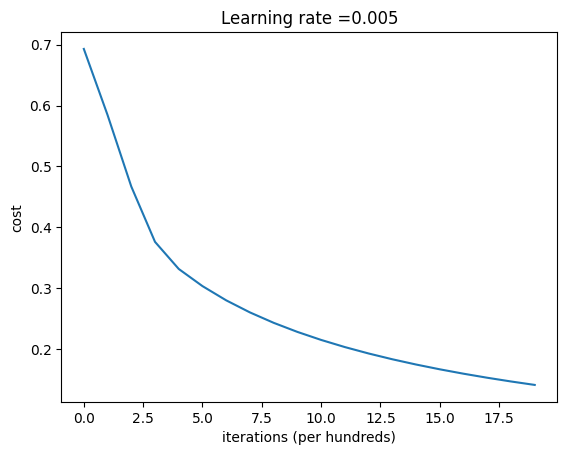

In [12]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Тестування на власних зображення

In [17]:
image_paths = [
    "gargouille.jpg",
    "cat_in_iran.jpg",
    "my_image.jpg",
    "my_image2.jpg",
    "la_defense.jpg"
]

 Прогноз

C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_36056\1788340106.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = f"Prediction: {'cat' if int(prediction) == 1 else 'non-cat'}"


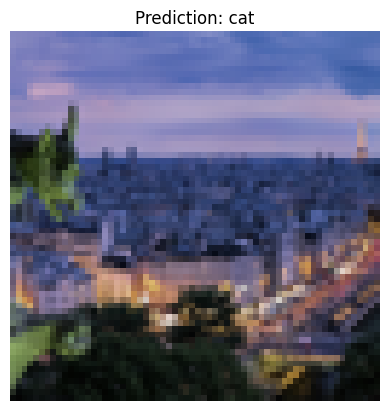

gargouille.jpg → Prediction: cat


C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_36056\1788340106.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return image_path.split("/")[-1], int(prediction)


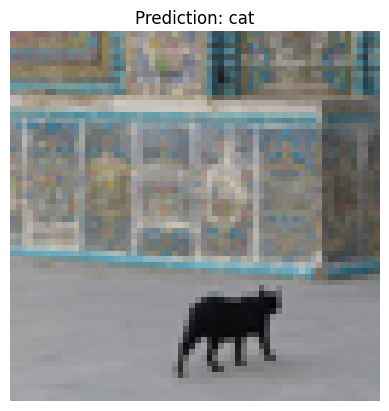

cat_in_iran.jpg → Prediction: cat


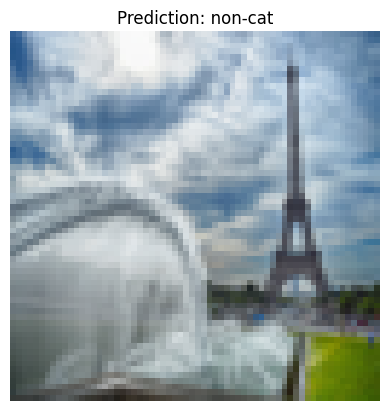

my_image.jpg → Prediction: non-cat


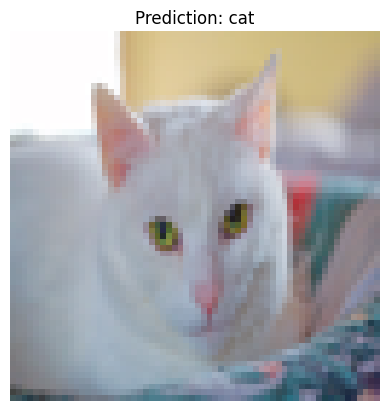

my_image2.jpg → Prediction: cat
Помилка з файлом la_defense.jpg: [Errno 2] No such file or directory: 'la_defense.jpg'


In [18]:
for img_path in image_paths:
    try:
        name, prediction = predict_and_show(img_path, d, num_px)
        print(f"{name} → Prediction: {'cat' if prediction == 1 else 'non-cat'}")
    except Exception as e:
        print(f"Помилка з файлом {img_path}: {e}")